First, we import the necessary libraries for our project

In [1]:
%matplotlib inline
import numpy as np
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.
/home/anorjuse/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


We load the MNIST dataset and normalize the values

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape)

(60000, 28, 28, 1)


Encode the labels as one-hot vectors

In [3]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

We define a function to create and train our model based on the parameter we pass to that function. This parameter will be the type of pooling we want to test.

In [14]:
def test(param):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    if param:
        model.add(param)
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=200, verbose=2)

Using our test function, we create and train 3 models with the three Pooling types (Max, Average and No pooling).

In [15]:
history_average = test(AveragePooling2D(pool_size=(2, 2)))
history_max = test(MaxPooling2D(pool_size=(2, 2)))
history_null = test(None)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
 - 4s - loss: 0.2789 - acc: 0.9212 - val_loss: 0.0960 - val_acc: 0.9733
Epoch 2/15
 - 4s - loss: 0.0878 - acc: 0.9739 - val_loss: 0.0616 - val_acc: 0.9805
Epoch 3/15
 - 4s - loss: 0.0609 - acc: 0.9815 - val_loss: 0.0481 - val_acc: 0.9837
Epoch 4/15
 - 4s - loss: 0.0486 - acc: 0.9846 - val_loss: 0.0404 - val_acc: 0.9871
Epoch 5/15
 - 4s - loss: 0.0414 - acc: 0.9870 - val_loss: 0.0405 - val_acc: 0.9860
Epoch 6/15
 - 4s - loss: 0.0348 - acc: 0.9891 - val_loss: 0.0377 - val_acc: 0.9882
Epoch 7/15
 - 4s - loss: 0.0288 - acc: 0.9912 - val_loss: 0.0367 - val_acc: 0.9871
Epoch 8/15
 - 4s - loss: 0.0244 - acc: 0.9924 - val_loss: 0.0364 - val_acc: 0.9883
Epoch 9/15
 - 4s - loss: 0.0212 - acc: 0.9935 - val_loss: 0.0385 - val_acc: 0.9877
Epoch 10/15
 - 4s - loss: 0.0191 - acc: 0.9940 - val_loss: 0.0377 - val_acc: 0.9878
Epoch 11/15
 - 4s - loss: 0.0177 - acc: 0.9943 - val_loss: 0.0351 - val_acc: 0.9894
Epoch 12/15
 - 4s - loss: 0.0141 - 

We define a single function to plot the accuracy and the loss of our models. Based on the label we pass as a parameter, the function will plot the training or validation results of each model.

In [12]:
def plot(label):
    type_list = [history_max, history_average, history_null]
    label_list = ['MAX', 'AVERAGE', 'NONE']
    
    if label == 'validation accuracy':
        key = 'val_acc'
    elif label == 'training accuracy':
        key = 'acc'
    elif label == 'validation loss':
        key = 'val_loss'
    else:
        key = 'loss'
        
    for item, description in zip(type_list, label_list):
        plt.plot(item.history[key], label=label + ' '+description) 
        
    plt.legend()
    plt.title(label)
    plt.show()

Finally, we use our plot function to see the accuracy and loss results of our models.

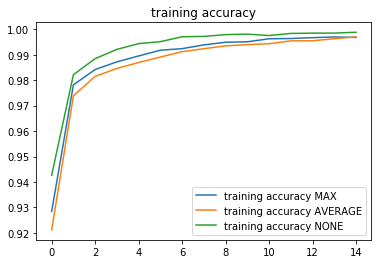

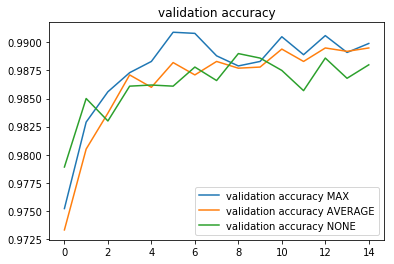

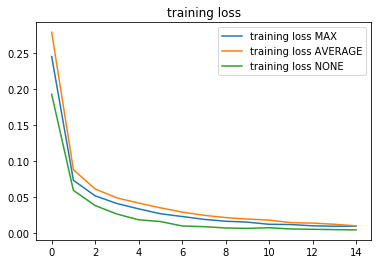

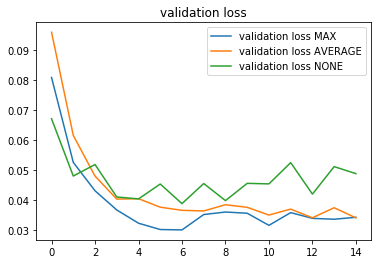

In [16]:
plot('training accuracy')
plot('validation accuracy')
plot('training loss')
plot('validation loss')

CONCLUSIONS

Based on the training accuracy and loss, it seems that the model with No Pooling gets the best results. But as soon as we check the validation results, we conclude that the Average Pooling model is the best one, followed by the Max Pooling model.